In [ ]:
import pandas as pd


In [9]:
rainfall = pd.read_csv("data/rainfall.csv", index_col=0, parse_dates=True, dtype=float)
rainfall

,rf
ymd,
1995-04-17,0.0
1995-04-18,0.0
1995-04-19,0.0
1995-04-20,0.0
1995-04-21,19.0
...,...
2021-12-27,0.0
2021-12-28,0.0
2021-12-29,0.0


In [10]:
dam = pd.read_csv("data/dam.csv", index_col=0, parse_dates=True, dtype=float)

In [11]:
# using query, get the data from 1996-01-01 to 2021-12-31
rainfall = rainfall.query("ymd >= '1996-01-01' and ymd <= '2021-12-31'")
df = dam.query("obsymd >= '1996-01-01' and obsymd <= '2021-12-31'")

# normalize the column features


In [204]:
from collections import defaultdict
# second, we need to get the waterlevel data from the wamis
w = Wamis(key="d6b380da63dce5cad61530489ba1d92985a9e85b07", urlcat="일수위자료")
# w.set_daily_wl()
waterlevel_obs_list = [1004690]
waterlevel_result = {}
startdt_list = [i*10000+101 for i in range(1995, 2021, 3)]
enddt_list = [i*10000+1231 for i in range(1997, 2023, 3)]
start_end_zip = zip(startdt_list, enddt_list)


for obs in waterlevel_obs_list:
    pockets = []
    for startdt, enddt in start_end_zip:
        w.set_daily_wl(startdt=startdt, enddt=enddt, ids=obs)
        pockets.append(w.get_df())
    waterlevel_result[obs] = pockets





In [206]:
waterlevel_result[1004690]

[{'result': {'code': 'success', 'msg': '완료되었습니다!'},
  'count': 1040,
  'list': [{'ymd': '19950101', 'wl': '.38'},
   {'ymd': '19950102', 'wl': '.35'},
   {'ymd': '19950103', 'wl': '.34'},
   {'ymd': '19950104', 'wl': '.38'},
   {'ymd': '19950105', 'wl': '.39'},
   {'ymd': '19950106', 'wl': '.39'},
   {'ymd': '19950107', 'wl': '.39'},
   {'ymd': '19950108', 'wl': '.35'},
   {'ymd': '19950109', 'wl': '.38'},
   {'ymd': '19950110', 'wl': '.38'},
   {'ymd': '19950111', 'wl': '.39'},
   {'ymd': '19950112', 'wl': '.38'},
   {'ymd': '19950113', 'wl': '.38'},
   {'ymd': '19950114', 'wl': '.38'},
   {'ymd': '19950115', 'wl': '.38'},
   {'ymd': '19950116', 'wl': '.38'},
   {'ymd': '19950117', 'wl': '.38'},
   {'ymd': '19950118', 'wl': '.37'},
   {'ymd': '19950119', 'wl': '.37'},
   {'ymd': '19950120', 'wl': '.36'},
   {'ymd': '19950121', 'wl': '.36'},
   {'ymd': '19950122', 'wl': '.36'},
   {'ymd': '19950123', 'wl': '.36'},
   {'ymd': '19950124', 'wl': '.38'},
   {'ymd': '19950125', 'wl': '.37'}

In [197]:
for i in range(len(waterlevel_result[1003664])):
    if waterlevel_result[1003664][i]["count"] == 0:
        waterlevel_result[1003664][i] = None
waterlevel_result[1003664] = [i for i in waterlevel_result[1003664] if i is not None]



In [207]:
df_list = []
for i in waterlevel_result[1004690]:
    df_list.append(pd.DataFrame(i["list"]))

df = pd.concat(df_list)


In [210]:
df.ymd = pd.to_datetime(df.ymd, format="%Y%m%d")
df = df.sort_values(by="ymd")
df.index = [i for i in range(len(df))]
df.to_csv("waterlevel.csv")


In [217]:
# and then, we need to get the rainfall data from the wamis

w = Wamis(key="d6b380da63dce5cad61530489ba1d92985a9e85b07", urlcat="일강수량자료")

rainfall_obs_list = [10034130]
rainfall_result = {}
df_list = []
obs = 10034130

for startdt, enddt in start_end_zip:
    




In [232]:
w.set_daily_rf(startdt=startdt_list[0], enddt=enddt_list[0], ids=10034130)
df1 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[1], enddt=enddt_list[1], ids=10034130)
df2 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[2], enddt=enddt_list[2], ids=10034130)
df3 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[3], enddt=enddt_list[3], ids=10034130)
df4 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[4], enddt=enddt_list[4], ids=10034130)
df5 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[5], enddt=enddt_list[5], ids=10034130)
df6 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[6], enddt=enddt_list[6], ids=10034130)
df7 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[7], enddt=enddt_list[7], ids=10034130)
df8 = pd.DataFrame(w.get_df()["list"])

w.set_daily_rf(startdt=startdt_list[8], enddt=enddt_list[8], ids=10034130)
df9 = pd.DataFrame(w.get_df()["list"])

df_rf = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])



In [234]:
df_rf.ymd = pd.to_datetime(df_rf.ymd, format="%Y%m%d")
df_rf = df_rf.sort_values(by="ymd")
df_rf.index = [i for i in range(len(df_rf))]
df_rf.to_csv("data/rainfall.csv")

In [250]:
rfd = pd.read_csv("data/rainfall.csv")
rfd = rfd.drop(["Unnamed: 0"], axis=1)

rfd

,ymd,rf
0,1995-04-17,0
1,1995-04-18,0
2,1995-04-19,0
3,1995-04-20,0
4,1995-04-21,19
...,...,...
9034,2021-12-27,0
9035,2021-12-28,0
9036,2021-12-29,0
9037,2021-12-30,0


In [252]:
rfd.rf = rfd.rf.str.replace(',', '').astype(float)


<Axes: xlabel='ymd'>

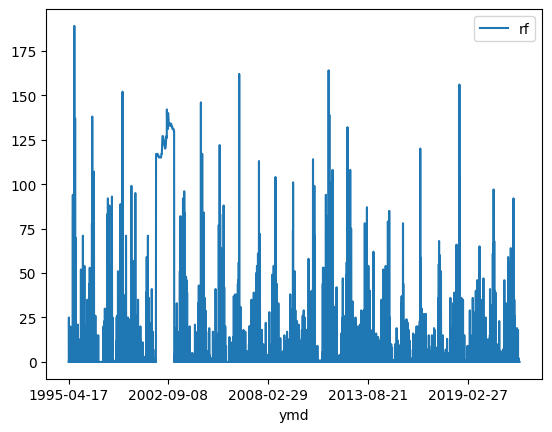

In [256]:


rfd.rf = rfd.rf.apply(lambda x: x/1000 if x > 200 else x)
rfd.plot(x="ymd", y="rf")

In [258]:
rfd.to_csv("data/rainfall.csv", index=False)

In [277]:
w = Wamis(key="d6b380da63dce5cad61530489ba1d92985a9e85b07", urlcat="일유량자료")
w.set_daily_flw(year=1996, ids=1004690)
df = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=1996, ids=1004690)
df2 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=1997, ids=1004690)
df3 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=1998, ids=1004690)
df4 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=1999, ids=1004690)
df5 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2000, ids=1004690)
df6 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2001, ids=1004690)
df7 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2002, ids=1004690)
df8 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2003, ids=1004690)
df9 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2004, ids=1004690)
df10 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2005, ids=1004690)
df11 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2006, ids=1004690)
df12 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2007, ids=1004690)
df13 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2008, ids=1004690)
df14 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2009, ids=1004690)
df15 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2010, ids=1004690)
df16 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2011, ids=1004690)
df17 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2012, ids=1004690)
df18 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2013, ids=1004690)
df19 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2014, ids=1004690)
df20 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2015, ids=1004690)
df21 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2016, ids=1004690)
df22 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2017, ids=1004690)
df23 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2018, ids=1004690)
df24 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2019, ids=1004690)
df25 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2020, ids=1004690)
df26 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2021, ids=1004690)
df27 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2022, ids=1004690)
df28 = pd.DataFrame(w.get_df()["list"])

w.set_daily_flw(year=2023, ids=1004690)
df29 = pd.DataFrame(w.get_df()["list"])

df_flw = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10,
                    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
                    df21, df22, df23, df24, df25, df26, df27, df28, df29])


<Axes: xlabel='ymd'>

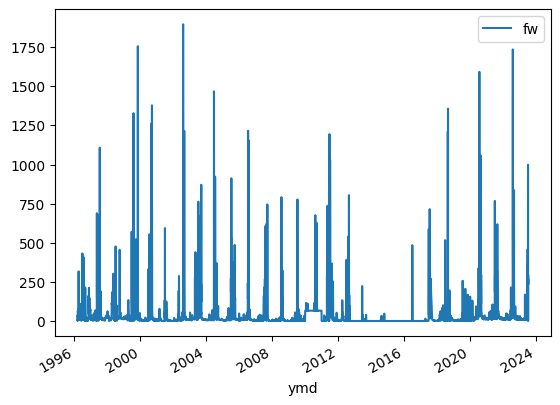

In [280]:
# preprocessing the data

df_flw.ymd = pd.to_datetime(df_flw.ymd, format="%Y%m%d")
df_flw = df_flw.sort_values(by="ymd")
df_flw.index = [i for i in range(len(df_flw))]
df_flw.fw = df_flw.fw.str.replace(',', '').astype(float)
df_flw.plot(x="ymd", y="fw")

In [281]:
df_flw.to_csv("data/flow.csv", index=False)

In [286]:
# lets merge the data
# since weater data is from 2008-09-28, left dataframe is the weather data
weather_df = pd.read_csv("data/weather.csv")
weather_df.ymd = pd.to_datetime(weather_df.ymd, format="%Y-%m-%d")
weather_df = weather_df[["ymd", "taavg", "hmavg"]]
weather_df

,ymd,taavg,hmavg
0,2008-09-28,13.7,72.9
1,2008-09-29,16.6,70.9
2,2008-09-30,15.0,79.3
3,2008-10-01,17.1,73.3
4,2008-10-02,17.6,72.4
...,...,...,...
5045,2022-12-27,-7.4,76.6
5046,2022-12-28,-4.6,68.2
5047,2022-12-29,-6.3,65.4
5048,2022-12-30,-4.1,71.6


<Axes: xlabel='ymd'>

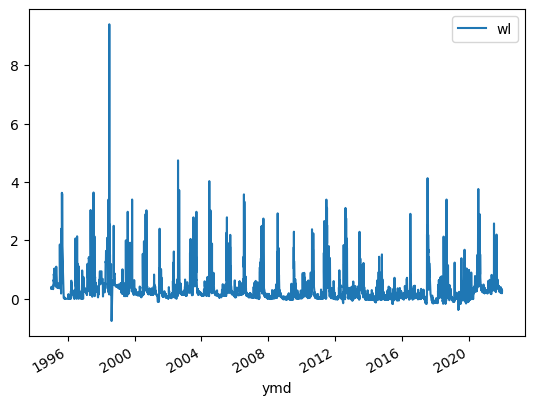

In [291]:
import numpy as np
# read waterlevel data
waterlevel_df = pd.read_csv("data/waterlevel.csv")
waterlevel_df.ymd = pd.to_datetime(waterlevel_df.ymd, format="%Y-%m-%d")
waterlevel_df = waterlevel_df[["ymd", "wl"]]
waterlevel_df.wl = waterlevel_df.wl.astype(float)
# if waterlevel_df.wl == -9999: change to nan
waterlevel_df.wl = waterlevel_df.wl.apply(lambda x: np.nan if x == -9999 else x)
waterlevel_df.wl = waterlevel_df.wl.interpolate(method="polynomial", order=3)
waterlevel_df.plot(x="ymd", y="wl")


In [300]:
new_df = pd.merge(weather_df, waterlevel_df, on="ymd", how="left")

# interpolate the new_df hmavg, taavg

new_df.taavg = new_df.taavg.interpolate(method="polynomial", order=3)
new_df.hmavg = new_df.hmavg.interpolate(method="polynomial", order=3)



In [301]:
new_df.dropna(inplace=True)

In [306]:
# and also read flow data

flow_df = pd.read_csv("data/flow.csv")
flow_df.ymd = pd.to_datetime(flow_df.ymd, format="%Y-%m-%d")
flow_df = flow_df[["ymd", "fw"]]
flow_df.fw = flow_df.fw.astype(float)

# check nan values

# and merge the flow data
new_df = pd.merge(new_df, flow_df, on="ymd", how="left")

In [310]:
# read rainfall data

rf_df = pd.read_csv("data/rainfall.csv")
rf_df.ymd = pd.to_datetime(rf_df.ymd, format="%Y-%m-%d")
rf_df = rf_df[["ymd", "rf"]]
rf_df.rf = rf_df.rf.astype(float)

# check nan values

# also plot the data


114    1995-08-09
125    1995-08-20
130    1995-08-25
473    1997-07-01
507    1997-08-04
          ...    
5589   2012-07-06
5644   2012-08-30
7048   2016-07-04
7833   2018-08-28
7839   2018-09-03
Name: ymd, Length: 388, dtype: datetime64[ns]

In [313]:
new_df = pd.merge(new_df, rf_df, on="ymd", how="left")

In [315]:
new_df.to_csv("data/merged.csv", index=False)

In [322]:
merged_df = pd.read_csv("data/merged.csv")

<Axes: xlabel='ymd'>

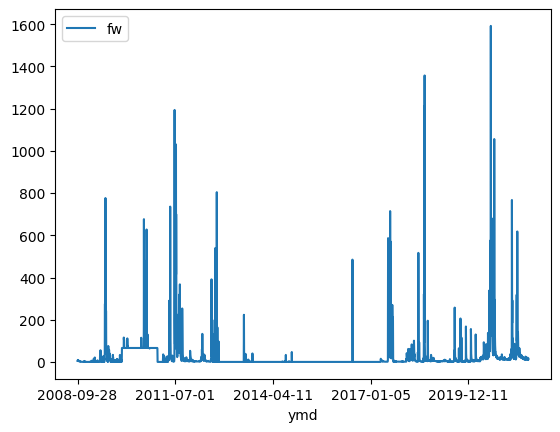

In [323]:
merged_df.plot(x="ymd", y="fw")

In [325]:
merged_df

,ymd,taavg,hmavg,wl,fw,rf
0,2008-09-28,13.7,72.9,0.0942,4.64,0.0
1,2008-09-29,16.6,70.9,0.0900,4.44,0.0
2,2008-09-30,15.0,79.3,0.1167,5.75,0.0
3,2008-10-01,17.1,73.3,0.1183,5.83,0.0
4,2008-10-02,17.6,72.4,0.1463,7.21,0.0
...,...,...,...,...,...,...
4613,2021-12-27,-8.6,62.7,0.1900,9.50,0.0
4614,2021-12-28,-4.1,83.8,0.2300,11.60,0.0
4615,2021-12-29,-0.2,76.5,0.2300,11.80,0.0
4616,2021-12-30,-3.0,53.7,0.2100,10.30,0.0


In [332]:
# and split the data into train, valid, test
# train: 2008-09-28 ~ 2018-09-27
# valid: 2018-09-28 ~ 2019-09-27
# test: 2019-09-28 ~ 2021-12-31

import torch
train_df = merged_df[merged_df.ymd < "2018-09-28"]
valid_df = merged_df[(merged_df.ymd >= "2018-09-28") & (merged_df.ymd < "2019-09-28")]
test_df = merged_df[merged_df.ymd >= "2019-09-28"]

train_data = train_df.to_numpy()
train_data

array([['2008-09-28', 13.7, 72.9, 0.0942, 4.64, 0.0],
       ['2008-09-29', 16.6, 70.9, 0.09, 4.44, 0.0],
       ['2008-09-30', 15.0, 79.3, 0.1167, 5.75, 0.0],
       ...,
       ['2018-09-25', 15.5, 69.2, 0.11, 6.3, 0.0],
       ['2018-09-26', 17.5, 62.0, 0.13, 6.9, 0.0],
       ['2018-09-27', 16.8, 62.8, 0.12, 6.6, 0.0]], dtype=object)

In [360]:
new_data = merged_df.copy()

In [361]:
# Convert 'ymd' column to datetime format
new_data['ymd'] = pd.to_datetime(new_data['ymd'])

# Create time features 'day_of_month' and 'day_of_year'
new_data['day_of_month'] = new_data['ymd'].dt.day
new_data['day_of_year'] = new_data['ymd'].dt.dayofyear

# Display the first few rows of the new data to check the changes
new_data.head()


,ymd,taavg,hmavg,wl,fw,rf,day_of_month,day_of_year
0,2008-09-28,13.7,72.9,0.0942,4.64,0.0,28,272
1,2008-09-29,16.6,70.9,0.0900,4.44,0.0,29,273
2,2008-09-30,15.0,79.3,0.1167,5.75,0.0,30,274
3,2008-10-01,17.1,73.3,0.1183,5.83,0.0,1,275
4,2008-10-02,17.6,72.4,0.1463,7.21,0.0,2,276


In [362]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the dynamic and target features
features = ['wl', 'taavg', 'hmavg', 'rf', 'fw']
scalers = {}

for feature in features:
    scaler = MinMaxScaler()
    new_data[feature] = scaler.fit_transform(new_data[feature].values.reshape(-1, 1))
    scalers[feature] = scaler

# Define the context and prediction lengths
context_length = 90
prediction_length = 7

# Create sequences
sequences = []
targets = []

for i in range(context_length, len(new_data) - prediction_length):
    sequences.append(new_data.iloc[i-context_length:i][['wl', 'taavg', 'hmavg', 'rf', 'day_of_month', 'day_of_year']].values)
    targets.append(new_data.iloc[i:i+prediction_length]['fw'].values)
    
sequences[0], targets[0]  # Display the first sequence and target


(array([[1.03155556e-01, 6.13445378e-01, 6.55263158e-01, 0.00000000e+00,
         2.80000000e+01, 2.72000000e+02],
        [1.02222222e-01, 6.74369748e-01, 6.28947368e-01, 0.00000000e+00,
         2.90000000e+01, 2.73000000e+02],
        [1.08155556e-01, 6.40756303e-01, 7.39473684e-01, 0.00000000e+00,
         3.00000000e+01, 2.74000000e+02],
        [1.08511111e-01, 6.84873950e-01, 6.60526316e-01, 0.00000000e+00,
         1.00000000e+00, 2.75000000e+02],
        [1.14733333e-01, 6.95378151e-01, 6.48684211e-01, 0.00000000e+00,
         2.00000000e+00, 2.76000000e+02],
        [1.25000000e-01, 6.76470588e-01, 7.61842105e-01, 0.00000000e+00,
         3.00000000e+00, 2.77000000e+02],
        [1.02222222e-01, 6.95378151e-01, 7.40789474e-01, 0.00000000e+00,
         4.00000000e+00, 2.78000000e+02],
        [1.00555556e-01, 7.14285714e-01, 7.39473684e-01, 1.21951220e-02,
         5.00000000e+00, 2.79000000e+02],
        [1.01488889e-01, 6.86974790e-01, 6.92105263e-01, 0.00000000e+00,
       

In [363]:
len(sequences)

4521

In [364]:
from torch.utils.data import Dataset, DataLoader
import torch

class TimeSeriesDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, index):
        sequence = self.sequences[index]
        target = self.targets[index]
        return torch.Tensor(sequence), torch.Tensor(target)

# Create instances of the TimeSeriesDataset for training and evaluation
dataset = TimeSeriesDataset(sequences, targets)

# Split the dataset into training and validation sets (70% training, 30% validation)
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

train_loader, val_loader


(<torch.utils.data.dataloader.DataLoader at 0x2a32a7d2650>,
 <torch.utils.data.dataloader.DataLoader at 0x2a32a7d2da0>)

In [367]:
next(iter(train_loader))[0].shape

torch.Size([32, 90, 6])

In [376]:
import torch.nn as nn
import torch

encoder_input_layer = nn.Linear(
    in_features=5,
    out_features=512
)

In [450]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, data, enc_seq_len, dec_seq_len, target_seq_len):
        self.data = data.to_numpy()
        self.enc_seq_len = enc_seq_len
        self.dec_seq_len = dec_seq_len
        self.target_seq_len = target_seq_len

    def __len__(self):
        return len(self.data) - self.enc_seq_len - self.dec_seq_len - self.target_seq_len + 1

    def __getitem__(self, index):
        enc_seq = self.data[index : index + self.enc_seq_len]
        dec_seq = self.data[index + self.enc_seq_len : index + self.enc_seq_len + self.dec_seq_len]
        target_seq = self.data[index + self.enc_seq_len + self.dec_seq_len : index + self.enc_seq_len + self.dec_seq_len + self.output_seq_len]
        return torch.tensor(enc_seq, dtype=torch.float32), torch.tensor(dec_seq, dtype=torch.float32), torch.tensor(target_seq, dtype=torch.float32)


In [451]:
dataset = TimeSeriesDataset(data = merged_df.iloc[:,1:], enc_seq_len=90, dec_seq_len=7, output_seq_len=7)

In [452]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


In [453]:
a, b, c = next(iter(dataloader))

In [454]:
a.shape

torch.Size([32, 90, 5])

In [455]:
import torch
import torch.nn as nn 
import math
from torch import nn, Tensor

class PositionalEncoder(nn.Module):
    """
    The authors of the original transformer paper describe very succinctly what 
    the positional encoding layer does and why it is needed:
    
    "Since our model contains no recurrence and no convolution, in order for the 
    model to make use of the order of the sequence, we must inject some 
    information about the relative or absolute position of the tokens in the 
    sequence." (Vaswani et al, 2017)
    Adapted from: 
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    """

    def __init__(
        self, 
        dropout: float=0.1, 
        max_seq_len: int=5000, 
        d_model: int=512,
        batch_first: bool=False
        ):

        """
        Parameters:
            dropout: the dropout rate
            max_seq_len: the maximum length of the input sequences
            d_model: The dimension of the output of sub-layers in the model 
                     (Vaswani et al, 2017)
        """

        super().__init__()

        self.d_model = d_model
        
        self.dropout = nn.Dropout(p=dropout)

        self.batch_first = batch_first

        # adapted from PyTorch tutorial
        position = torch.arange(max_seq_len).unsqueeze(1)
        
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        
        if self.batch_first:
            pe = torch.zeros(1, max_seq_len, d_model)
            
            pe[0, :, 0::2] = torch.sin(position * div_term)
            
            pe[0, :, 1::2] = torch.cos(position * div_term)
        else:
            pe = torch.zeros(max_seq_len, 1, d_model)
        
            pe[:, 0, 0::2] = torch.sin(position * div_term)
        
            pe[:, 0, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe)
        
    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [batch_size, enc_seq_len, dim_val] or 
               [enc_seq_len, batch_size, dim_val]
        """
        if self.batch_first:
            x = x + self.pe[:,:x.size(1)]
        else:
            x = x + self.pe[:x.size(0)]

        return self.dropout(x)


In [456]:
encoder_input_layer = nn.Linear(
    in_features=5,
    out_features=512,
    dtype = torch.float32
)

layer_out = encoder_input_layer(a)

In [457]:
pe = PositionalEncoder(batch_first=True)
layer_out = pe(layer_out)

In [458]:
layer_out.shape

torch.Size([32, 90, 512])

In [459]:
encoder_layer = nn.TransformerEncoderLayer(
    d_model=512, 
    nhead=8,
    dim_feedforward=1024,
    dropout=0.2,
    batch_first=True
)

encoder = nn.TransformerEncoder(
    encoder_layer=encoder_layer,
    num_layers=4, 
    norm=None
    )
encoder_out = encoder(layer_out)
encoder_out.shape


torch.Size([32, 90, 512])

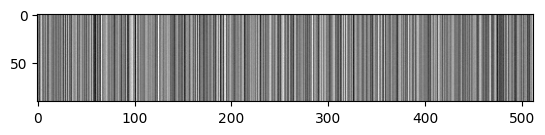

In [467]:
plt.imshow(encoder_out.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")

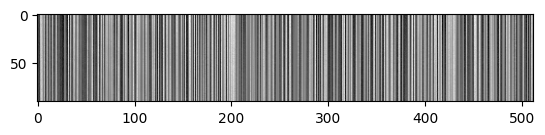

In [468]:
plt.imshow(layer_out.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")

In [483]:
decoder_layer = nn.TransformerDecoderLayer(
  d_model=512, 
  nhead=8,
  batch_first=True
  )
# Stack the decoder layer n times
decoder = nn.TransformerDecoder(
  decoder_layer=decoder_layer,
  num_layers=4, 
  norm=None
  )

decoder_input_layer = nn.Linear(in_features=5, out_features=512)
decoder_input = decoder_input_layer(b)
decoder_out = decoder(tgt = decoder_input, memory=encoder_out)
decoder_out.shape


torch.Size([32, 7, 512])

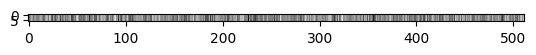

In [484]:
plt.imshow(decoder_out.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")

In [490]:
linear_mapping = nn.Linear(in_features=512, out_features=5)
linear_mapping_out = linear_mapping(decoder_out)
linear_mapping_out.shape

torch.Size([32, 7, 5])

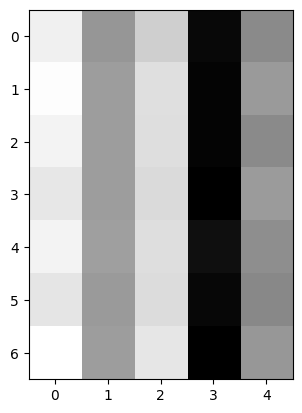

In [491]:
# plot the output of the linear mapping layer
plt.imshow(linear_mapping_out.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")


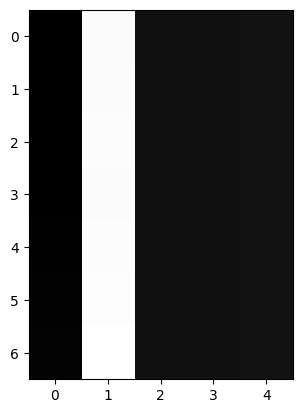

In [479]:
plt.imshow(b.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")

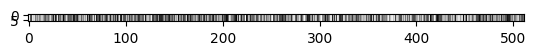

In [474]:
plt.imshow(decoder_layer_out.mean(dim=0).squeeze(0).detach().numpy(), cmap="gray")